In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# Loads feature data from CSV files
X_train = pd.read_csv('train_reduced_gB4.csv')
X_val = pd.read_csv('validation_reduced_gB4.csv')
X_test = pd.read_csv('test_reduced_gB4.csv')

# Loads target data from CSV files
Y_train = pd.read_csv('train_target_gB4.csv').squeeze()
Y_val = pd.read_csv('validation_target_gB4.csv').squeeze()
Y_test = pd.read_csv('test_target_gB4.csv').squeeze()

# Determines the best polynomial order using validation data (using R²)
best_order = 1
best_r2 = float('-inf')

for degree in range(1, 10):  # Test polynomial degrees from 1 to 10
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_val_poly = poly.transform(X_val)
    
    model = LinearRegression()
    model.fit(X_train_poly, Y_train)
    
    X_val_pred = model.predict(X_val_poly)
    r2 = r2_score(Y_val, X_val_pred)
    
    if r2 > best_r2:
        best_r2 = r2
        best_order = degree

print(f"Best polynomial degree: {best_order}")
print(f"Best R² on validation set: {best_r2}")

Best polynomial degree: 3
Best R² on validation set: 0.35918686518583676


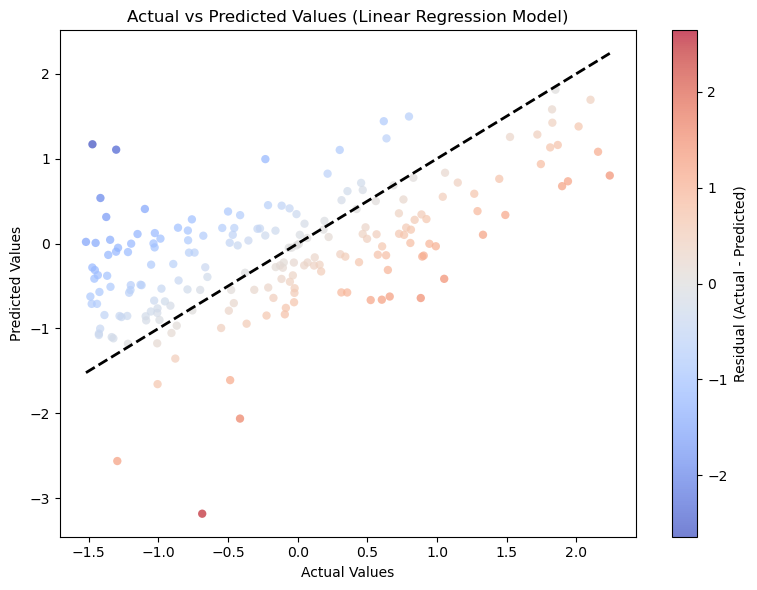

R² score: 0.3248
Mean Absolute Error (MAE): 0.6330
Mean Squared Error (MSE): 0.6205
Root Mean Squared Error (RMSE): 0.7877


In [4]:
# Merges the training and validation feature sets
X_trainval = pd.concat([X_train, X_val], ignore_index=True)
Y_trainval = pd.concat([Y_train, Y_val], ignore_index=True)

# Creates polynomial features using the best polynomial order
poly = PolynomialFeatures(degree=best_order)
X_trainval_poly = poly.fit_transform(X_trainval)
X_test_poly = poly.transform(X_test)

# Fits a linear regression model using the polynomial features
final_model = LinearRegression()
final_model.fit(X_trainval_poly, Y_trainval)

# Makes predictions using the trained final_model
X_test_pred = final_model.predict(X_test_poly)

# Evaluates the model's performance on the test set
test_r2 = r2_score(Y_test, X_test_pred)
test_mse = mean_squared_error(Y_test, X_test_pred)
test_mae = mean_absolute_error(Y_test, X_test_pred)
test_rmse = np.sqrt(test_mse)

# Calculates residuals
residuals = Y_test - X_test_pred

# Creates a scatter plot of actual vs predicted values without outlined points
plt.figure(figsize=(8, 6))
sc = plt.scatter(Y_test, X_test_pred, c=residuals, cmap='coolwarm', edgecolor='none', alpha=0.7, vmin=-np.max(np.abs(residuals)), vmax=np.max(np.abs(residuals)))
plt.colorbar(sc, label='Residual (Actual - Predicted)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression Model)')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()

print(f"R² score: {test_r2:.4f}")
print(f"Mean Absolute Error (MAE): {test_mae:.4f}")
print(f"Mean Squared Error (MSE): {test_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.4f}")

In [5]:
# Export predicted values to a CSV file for hybrid model use
pd.DataFrame(X_test_pred, columns=['Predicted']).to_csv('LR_pred_gB4.csv', index=False)